# CONNECTEL CUSTOMER CHURN PREDICTION

## Overveiw of the Connectel
ConnectTel is a leading global telecommunications company providing reliable voice, data, and internet services. It offers mobile networks, broadband, and enterprise solutions to individuals and businesses. With a focus on innovation, customer service, and strategic partnerships, ConnectTel ensures seamless connectivity and continues to revolutionize the telecom industry.

## Problem Overview

ConnectTel Telecom is experiencing high customer churn, threatening its business sustainability and growth. The company's existing retention strategies are ineffective, leading to the loss of valuable customers to competitors. 

To address this, ConnectTel needs a robust customer churn prediction system using advanced analytics and machine learning. By accurately forecasting churn, the company aims to implement targeted retention initiatives, reduce attrition, enhance customer loyalty, and maintain a competitive edge in the telecom industry.


In [152]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
      
# Data pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv(r"C:\Users\BAKARE\Downloads\Customer Churn.csv")

In [8]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
# Check for dimensionality of the data
data.shape

(7043, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Data  Cleaning

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

In [ ]:
## After converting Totalcharges from object to float, there are 11 missing row from the data


In [18]:
## Descriptive Statiscal Analysis
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
## Catgorical Statistical Analysis
data.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [22]:
## Drop CustomerID column
data.drop("customerID", axis=1, inplace= True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: >

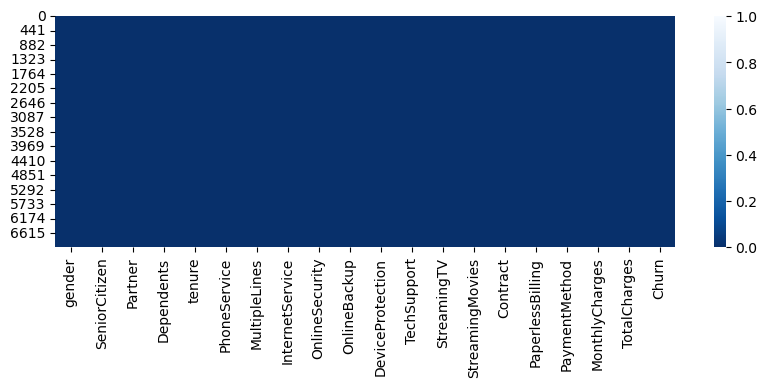

In [24]:
## Check for missing value 
print(data.isnull().sum())

## Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar= True, cmap="Blues_r")

#### This visualization depicts the missing values in Total charges

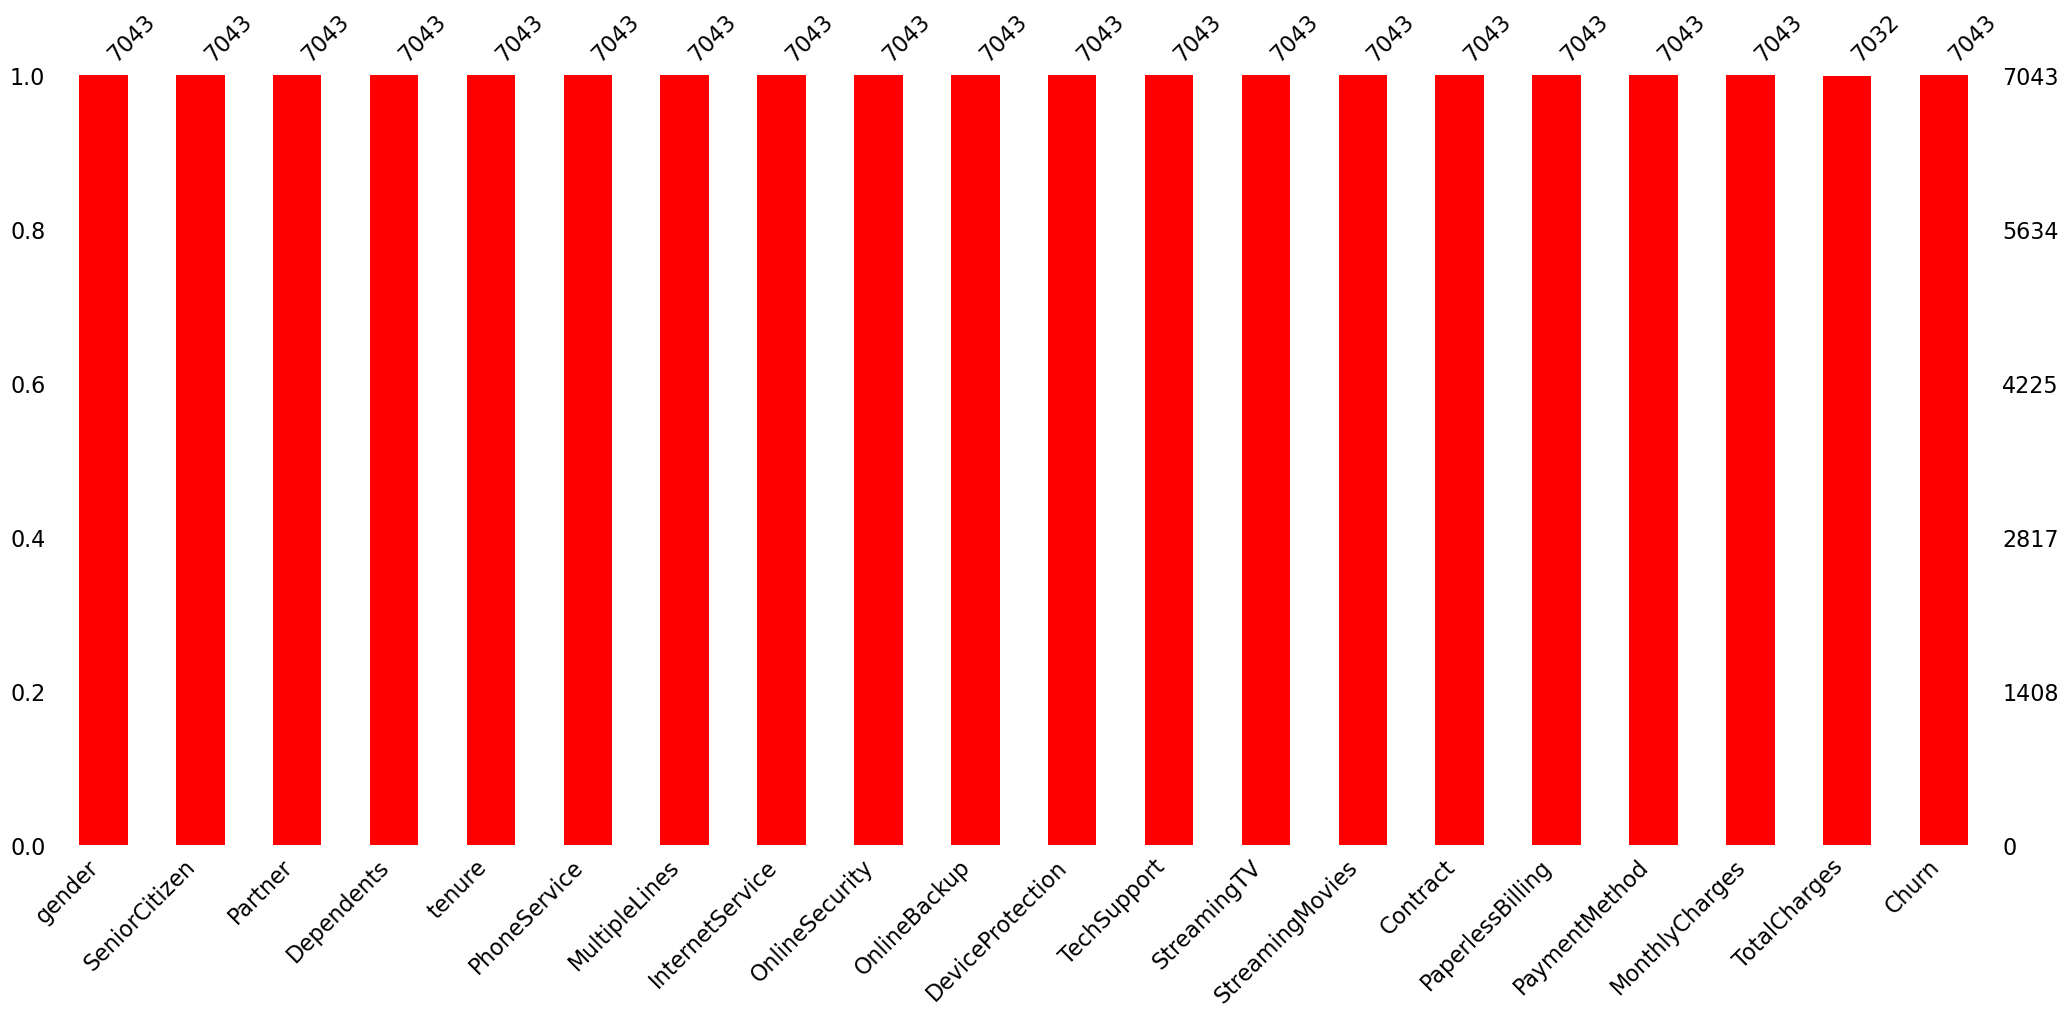

In [30]:
msno.bar(data, color = "red");

In [32]:
## Investigate the rows with missing values in 'TotalCharges'
rows_with_missing_values = data[data['TotalCharges'].isnull()]
print(rows_with_missing_values)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [34]:
#fillin the missing data with median

Median = data['TotalCharges'].median()
Median

1397.475

In [36]:
data['TotalCharges'].fillna(value = 1397.475, inplace = True)
df1 = data.isna().sum()

#### . Missing values are replaced with the median

### Exploratory Data Analysis

In [39]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
# create a copy of the dataframe to perform EDA so as not to tamper with the original dataframe

data2 = data.copy()
data3 = data.copy()

#### Univariate, Bivariate And Multivariate Analysis

In [46]:
## Show the categorical rows
categorical_cols = data2.select_dtypes(include=['object'])


In [50]:
## Show the numerical rows
numerical_cols = data2.select_dtypes(include=['number'])
numerical_cols 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


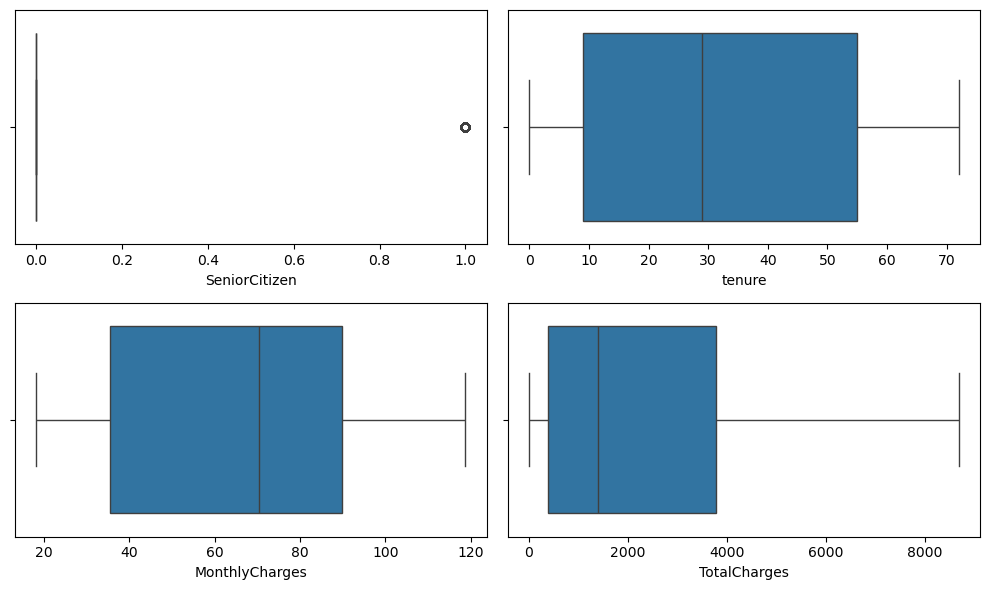

In [54]:
# Check for outliers
# Using Boxplot
plt.figure(figsize=(10,6))

for i, column in enumerate(numerical_cols , 1):
    plt.subplot(2,2,i)
    sns.boxplot(data= numerical_cols , x = column)

plt.tight_layout()    
plt.show()

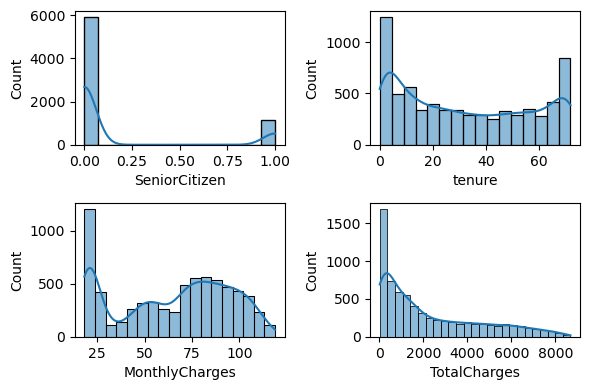

In [56]:
plt.figure(figsize=(6,4))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(data = numerical_cols, x = column, kde = True)
plt.tight_layout()    
plt.show()

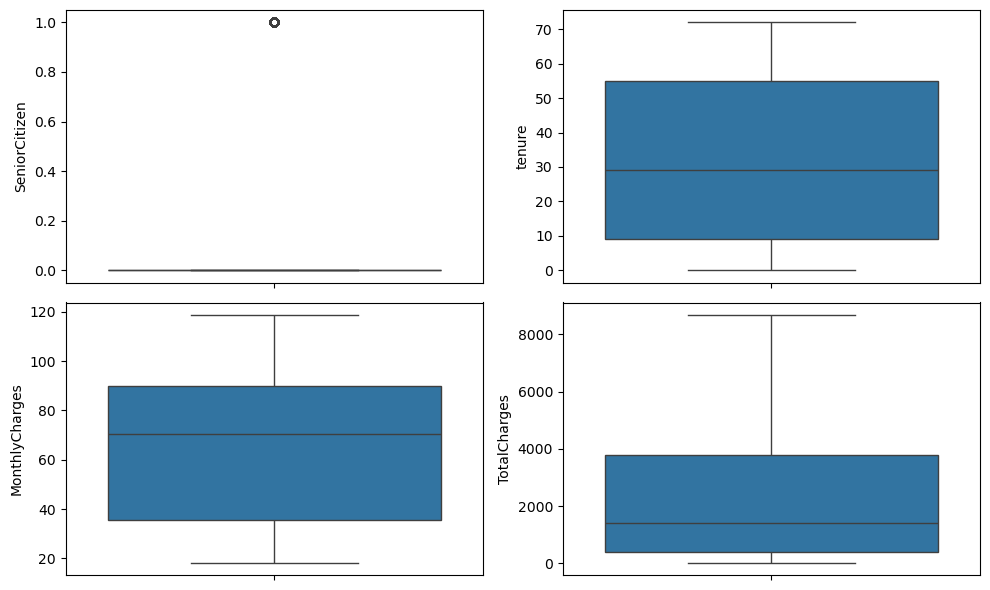

In [58]:
plt.figure(figsize=(10,6))

for i, column in enumerate(numerical_cols , 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = numerical_cols , y= column)

plt.tight_layout()    
plt.show()

### Univariate Aanalysis

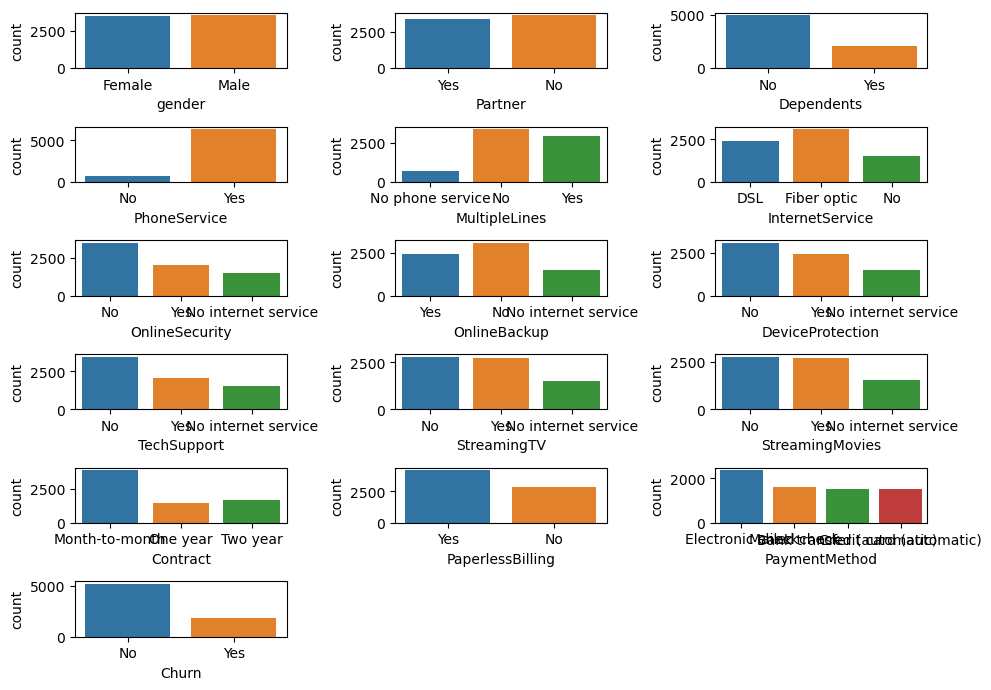

In [62]:
plt.figure(figsize=(10,7))

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(6,3,i)
    sns.countplot(data = categorical_cols, x = column, hue=column)
    
plt.tight_layout()    
plt.show()

## BIvariate Analysis

In [195]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


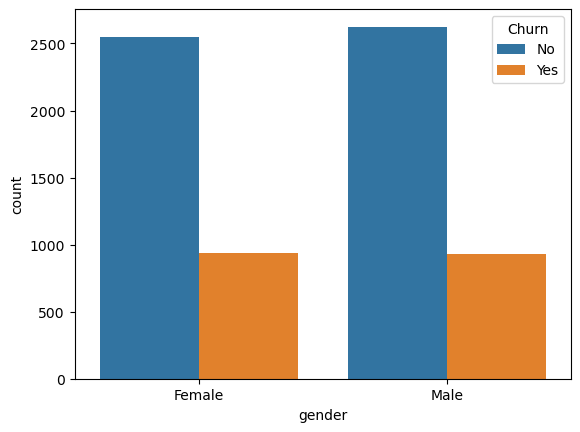

In [66]:
# Churn rate based on Gender

sns.countplot(data=categorical_cols, x = "gender", hue = "Churn")

data.groupby(["gender", "Churn"]).size().unstack()


#### Comment
#### Gender does not significantly impact churn. Both male and female customers have similar churn rates

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


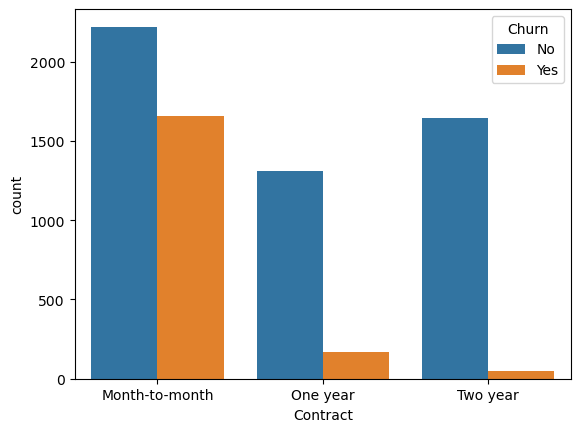

In [68]:
# Churn rate based on Contract Type

sns.countplot(data=categorical_cols, x = "Contract", hue = "Churn")

data.groupby(["Contract", "Churn"]).size().unstack()


#### The countplot shows that customers with month-to-month contracts are more likely to churn compared to those with one-year or two-year contracts. Longer-term contracts seem to be associated with lower churn rates

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


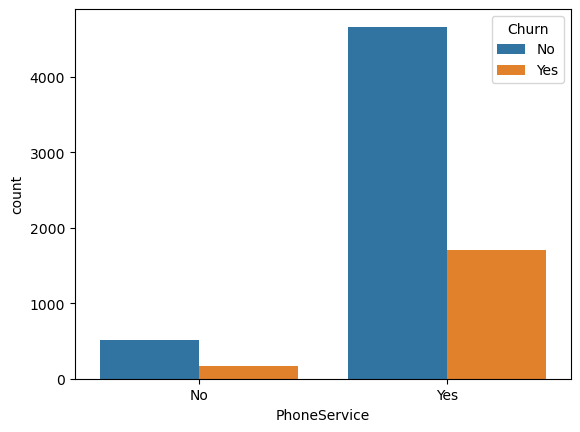

In [182]:
# Churn rate based on Payment method

sns.countplot(data=categorical_cols, x = "PhoneService", hue = "Churn")

data.groupby(["PhoneService", "Churn"]).size().unstack()

#### Comment
#### This visual depicts that customers with phone service are high churners

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


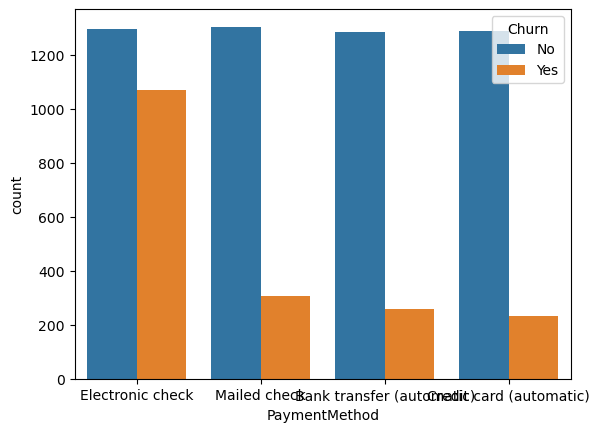

In [187]:
# Churn rate based on Payment method

sns.countplot(data=categorical_cols, x = "PaymentMethod", hue = "Churn")

data.groupby(["PaymentMethod", "Churn"]).size().unstack()

#### Comment

#### Customers who use Electronic Check have the highest churn rate, as they are more likely to leave compared to other payment methods. In contrast, those using Bank Transfer (Automatic) and Credit Card (Automatic) have the lowest churn rates, indicating they tend to stay with the company longer. Mailed Check users fall in between, with a moderate churn rate. This pattern suggests that customers on automatic payment methods are more committed, while those using Electronic Check may prefer more flexible, short-term arrangements.

### Multivariate Analysis

Text(0.5, 1.02, 'Pair Plot of Key Variables with Churn')

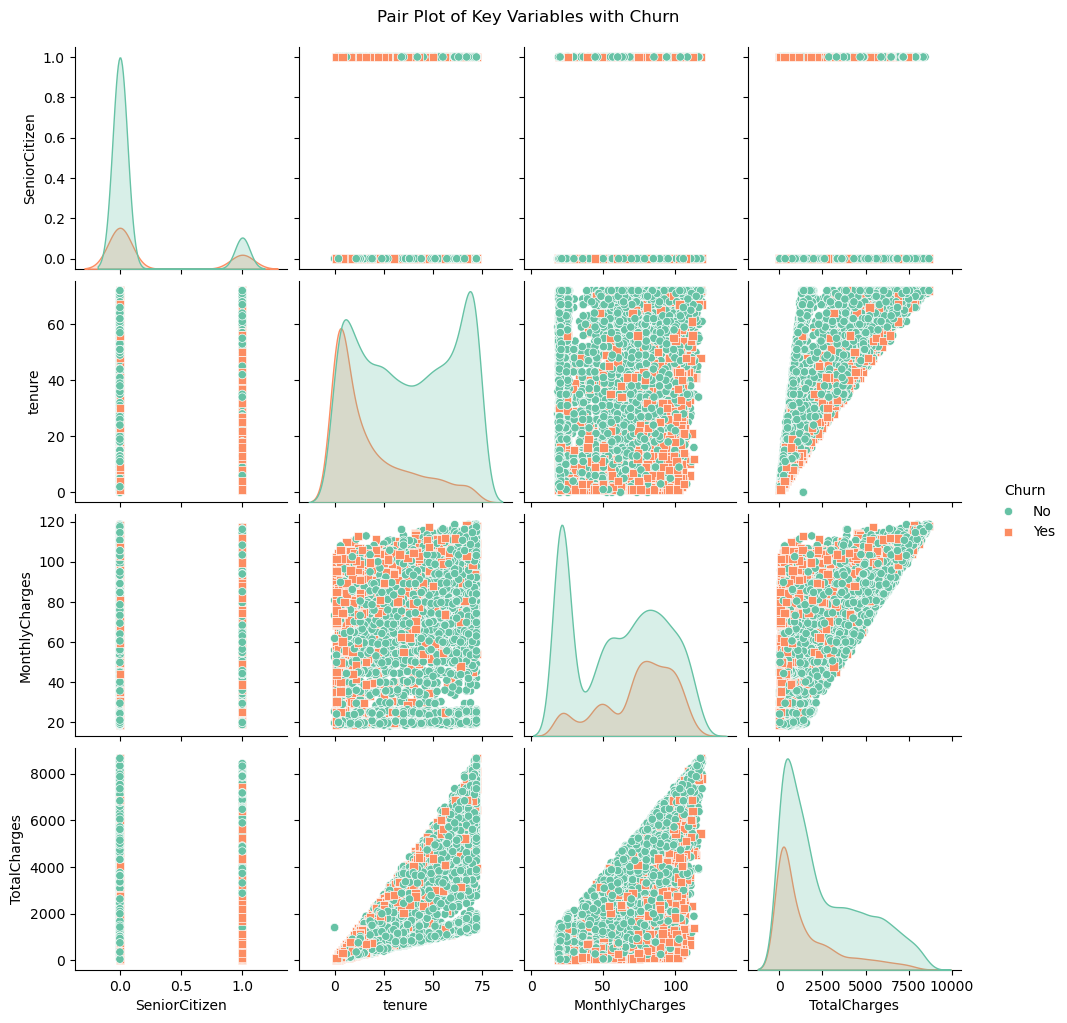

In [75]:
pair_plot_data = data[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# Using a pair plot to visualize the relationships
sns.pairplot(pair_plot_data, hue='Churn', palette="Set2", diag_kind="kde", markers=["o", "s"])
plt.suptitle('Pair Plot of Key Variables with Churn', y=1.02) # Adjusting title position plt. show)

                                                         

#### COMMENTS

#### TotalCharges and tenure shows few outliers in customers that didnt churn

In [77]:
correlation_matrix = numerical_cols.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


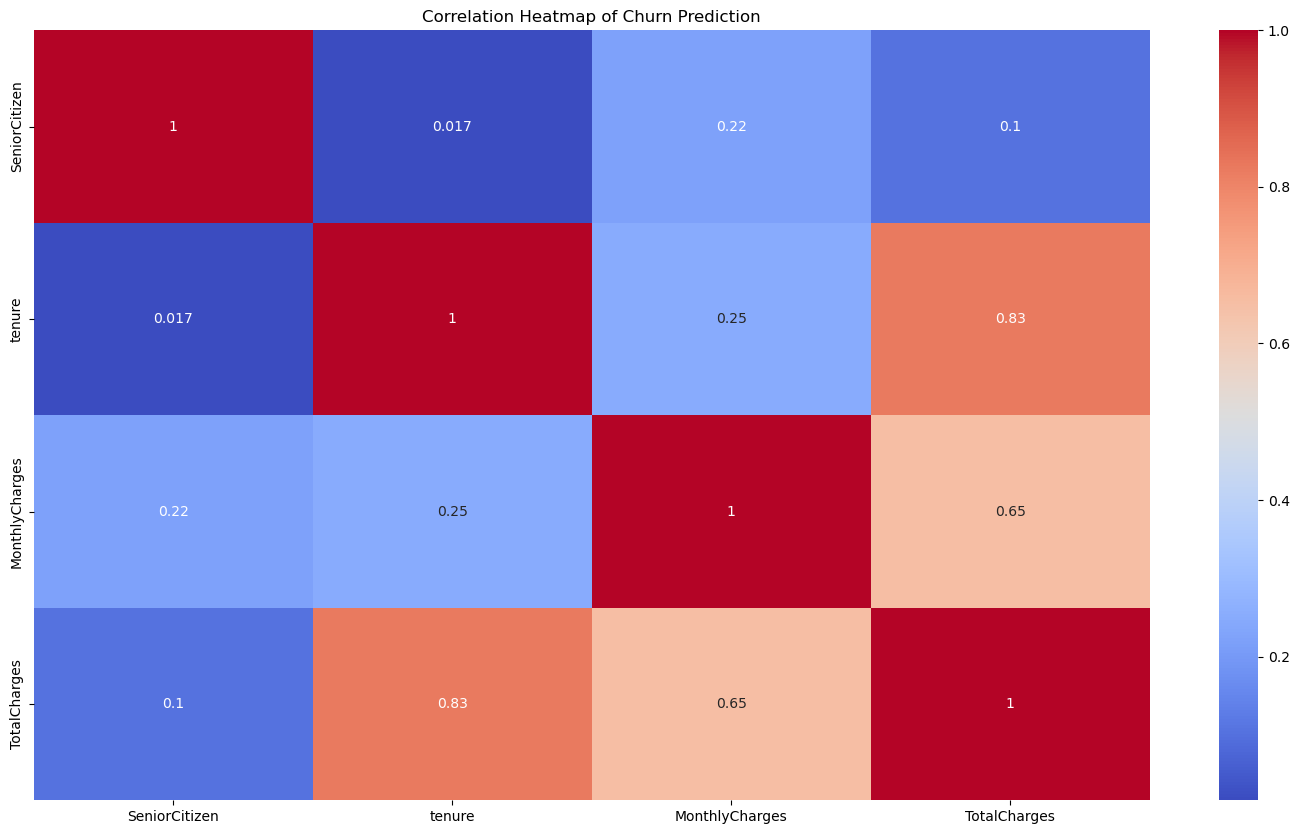

In [79]:
#Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Churn Prediction')
plt.show()

### COMMENTS

#### This shows TotalCharges is on the high side in correlation to how customer churn

### Feature Engineering
Encode categorical variable
segment data into predictor and target variable
Scale numerical column
split dataset to training and test

In [82]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
categorical_columns = data3.select_dtypes(include=['object'])
categorical_columns.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in categorical_columns.columns:
    data3[col] = label.fit_transform(data3[col])

In [89]:
data3.corr()['Churn']

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199037
Churn               1.000000
Name: Churn, dtype: float64

In [93]:
#scaling
X = data3.drop(['Churn'], axis = 1)

y = data3['Churn']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


### TRAIN /TEST MODELS & EVALUATE METRICS

In [96]:
#Train and test at least 3 supervised learning model
#Split the dataset into training and testing set-- X = Questions, y = Answers

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

In [102]:
# Instantiate and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create a predictive model
y_pred = logreg.predict(X_test)

# Model evaluation
print("Logistic Regression")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1283
           1       0.67      0.55      0.61       478

    accuracy                           0.80      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.80      0.80      1761



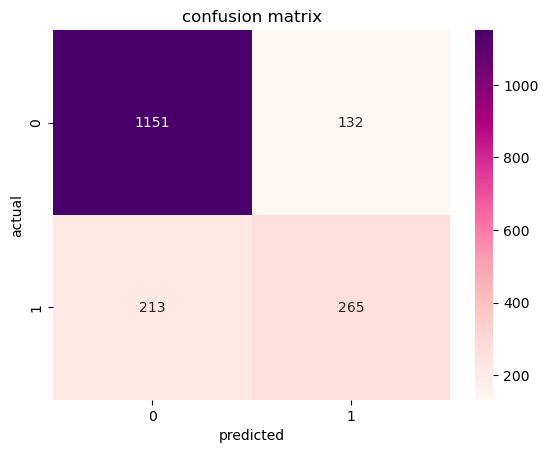

In [108]:

# create a confusion matrix for the logistic regression model
lr = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(lr, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

COMMENTS

This model tells us that the Accuracy Score suggested a good performance because its close to the train accuracy and also the confusion matrix indicates true negative(TN) is on the high side which means a lot of customers did not churn the companywhile the TP shows that few numbers of people actually churned the company but can still be on for retention.


In [110]:
#instantiate and fit the model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# create a predictive model
rfy_pred = rf.predict(X_test)

# model evaluation
print("Random Forest classifier")
print("classification report: \n", classification_report(y_test,rfy_pred))

Random Forest classifier
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1283
           1       0.65      0.49      0.55       478

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



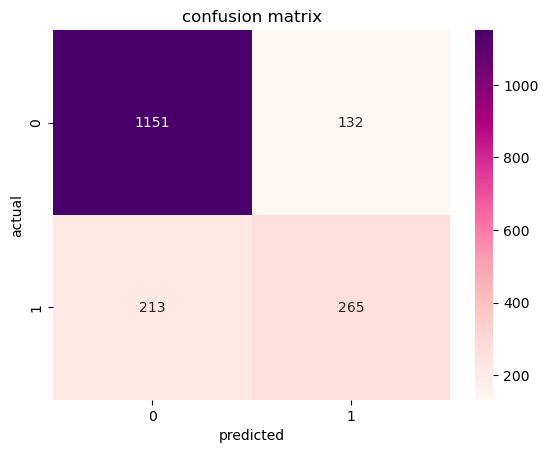

In [114]:

# create a confusion matrix for the logistic regression model
lr = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(lr, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [116]:
# k nearest neighbor classifier
#instantiate and fit the model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# create a predictive model
knny_pred = knn.predict(X_test)

# model evaluation
print("k nearest neighbor classifier")
print("classification report: \n", classification_report(y_test,knny_pred))

k nearest neighbor classifier
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1283
           1       0.56      0.42      0.48       478

    accuracy                           0.75      1761
   macro avg       0.68      0.65      0.66      1761
weighted avg       0.74      0.75      0.74      1761



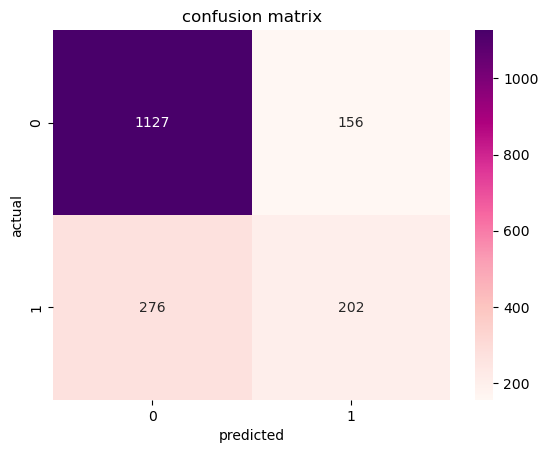

In [120]:

# create a confusion matrix for the k nearest neighbor classifier model
knny = confusion_matrix(y_test, knny_pred)

# visualize the confusion matrix
sns.heatmap(knny, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [122]:
# XGB Classifier
#instantiate and fit the model

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# create a predictive model
xgby_pred = xgb.predict(X_test)

# model evaluation
print("XGB Classifier")
print("classification report: \n", classification_report(y_test,xgby_pred))

XGB Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1283
           1       0.60      0.50      0.54       478

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.76      0.77      0.77      1761



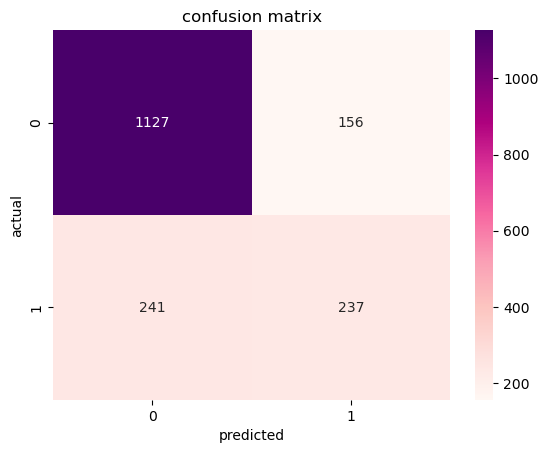

In [124]:

# create a confusion matrix for the XGBClassifier model
xgby = confusion_matrix(y_test, xgby_pred)

# visualize the confusion matrix
sns.heatmap(xgby, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [126]:
# Stochastic gradient descent Classifier(SGD)
#instantiate and fit the model

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# create a predictive model
sgdy_pred = sgd.predict(X_test)

# model evaluation
print("SGD Classifier")
print("classification report: \n", classification_report(y_test,sgdy_pred))

SGD Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1283
           1       0.64      0.40      0.49       478

    accuracy                           0.77      1761
   macro avg       0.72      0.66      0.67      1761
weighted avg       0.76      0.77      0.76      1761



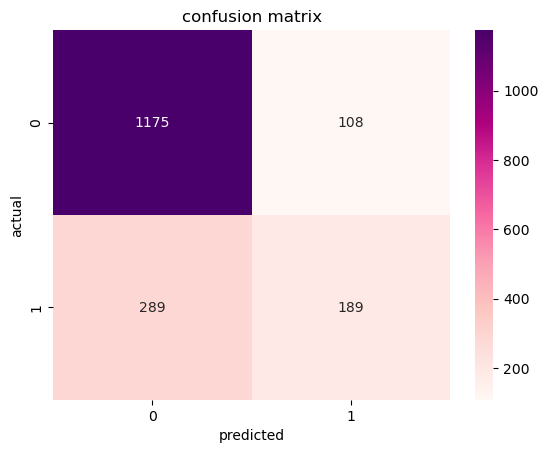

In [128]:
# create a confusion matrix for the SGD Classifier model
sgdy = confusion_matrix(y_test, sgdy_pred)

# visualize the confusion matrix
sns.heatmap(sgdy, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [130]:
# naive bayes classifier
#instantiate and fit the model

nb = GaussianNB()
nb.fit(X_train, y_train)

# create a predictive model
nby_pred = nb.predict(X_test)

# model evaluation
print("Gaussian NB")
print("classification report: \n", classification_report(y_test,nby_pred))

Gaussian NB
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1283
           1       0.55      0.74      0.63       478

    accuracy                           0.77      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.77      0.78      1761



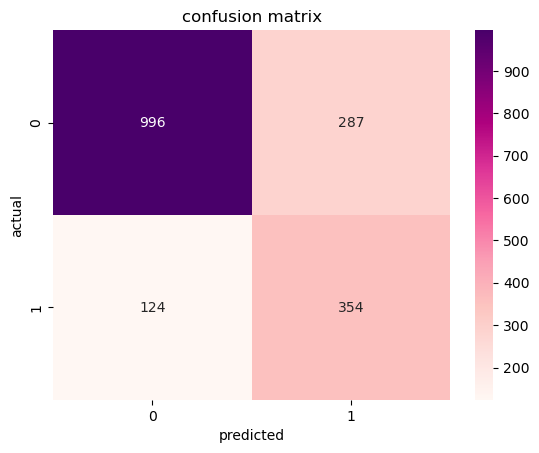

In [132]:

# create a confusion matrix for the naive bayes model
nby = confusion_matrix(y_test, nby_pred)

# visualize the confusion matrix
sns.heatmap(nby, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [134]:
# Decision Tree Classifier
#instantiate and fit the model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# create a predictive model
dty_pred = dt.predict(X_test)

# model evaluation
print("Decision Tree Classifier")
print("classification report: \n", classification_report(y_test,dty_pred))

Decision Tree Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1283
           1       0.50      0.48      0.49       478

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.73      0.73      0.73      1761



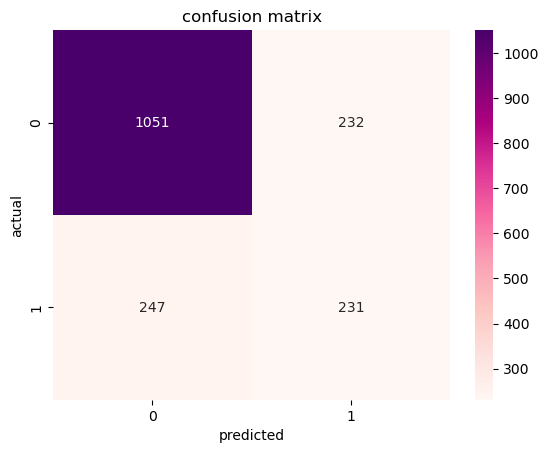

In [136]:

# create a confusion matrix for the Decision Tree model
dty = confusion_matrix(y_test, dty_pred)

# visualize the confusion matrix
sns.heatmap(dty, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [138]:
# Support Vector Classifier
#instantiate and fit the model

svc = SVC()
svc.fit(X_train, y_train)

# create a predictive model
svcy_pred = svc.predict(X_test)

# model evaluation
print("Support Vector Classifier")
print("classification report: \n", classification_report(y_test,svcy_pred))

Support Vector Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1283
           1       0.00      0.00      0.00       478

    accuracy                           0.73      1761
   macro avg       0.36      0.50      0.42      1761
weighted avg       0.53      0.73      0.61      1761



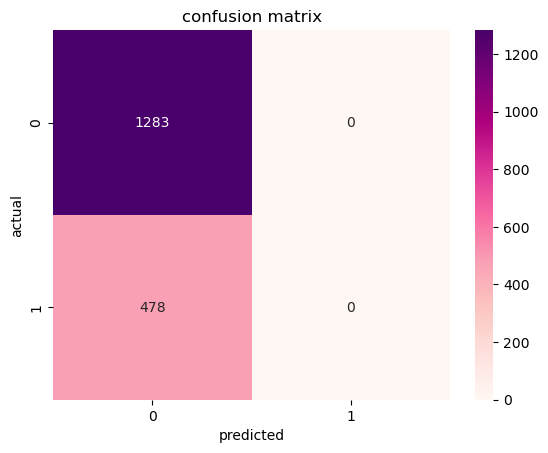

In [140]:

# create a confusion matrix for the Support Vector model
svcy = confusion_matrix(y_test, svcy_pred)

# visualize the confusion matrix
sns.heatmap(svcy, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [146]:
classifiers = [[XGBClassifier(),"XGB Classifier"],
             [RandomForestClassifier(),"Random Forest"],
             [KNeighborsClassifier(),"K-Nearest Neighbours"],
             [SGDClassifier(),"SGD Classifier"],
             [SVC(), "SVC"],
             [GaussianNB(),"Naive Bayes"],
             [DecisionTreeClassifier(random_state = 42), "Decision tree"],
             [LogisticRegression(),"Logistic Regression"]
             ]

In [154]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + "%"])
    
    if model_name != classifiers[-1][1]:
        print(" ")
 
 
 

In [156]:
print("Accuracy score")
ml = pd.DataFrame(acc_list)
ml.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,77.46%,78.82%,75.47%,76.89%,72.86%,76.66%,71.72%,80.41%


In [158]:
print("precision")
m2 = pd.DataFrame(precision_list)
m2.head()

precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,60.31%,64.54%,56.42%,67.49%,0.0%,55.23%,47.89%,66.75%


In [160]:
print("Recall")
m3 = pd.DataFrame(recall_list)
m3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,49.58%,48.74%,42.26%,28.66%,0.0%,74.06%,47.49%,55.44%


In [162]:
print("ROC score")
m4 = pd.DataFrame(roc_list)
m4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,68.71%,69.38%,65.05%,61.76%,50.0%,75.84%,64.12%,72.58%


##### Since the business main objective is to accurately identify and predict as many customers churn inorder to take proactive measures to retain them ,then the best predictive model for this business would be

Naive Bayes which has high Recall of 74.06%

Secondly, logistics Regression which has ROC curve of 72.58%